In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
import ezdxf
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend, pymupdf, layout, config
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
from ezdxf.sections.header import HeaderSection
import os
import math
import random
import fitz

関数

In [6]:
def show(doc, msp):
    # plot
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)
    fig.show()

https://ezdxf.readthedocs.io/en/stable/tutorials/image_export.html

In [7]:
def export_png(doc, msp, pagesize, output_name:str="test.png", cfg=None):
    # 1. create the render context
	context = RenderContext(doc)
    # 2. create the backend
	backend = pymupdf.PyMuPdfBackend()
    # 3. create the frontend
	if cfg==None:
		# 特に指定がない場合は白黒変換
		cfg = config.Configuration(
			background_policy=config.BackgroundPolicy.WHITE,
			color_policy=config.ColorPolicy.BLACK
			)
	frontend = Frontend(context, backend, config=cfg)
    # 4. draw the modelspace
	frontend.draw_layout(msp)
    # 5. create an A4 page layout, not required for all backends
	page = layout.Page(pagesize[0], pagesize[1], layout.Units.mm, margins=layout.Margins.all(20))
    # 6. get the PNG rendering as bytes
	png_bytes = backend.get_pixmap_bytes(page, fmt="png", dpi=96)
	with open(output_name, "wb") as fp:
		fp.write(png_bytes)

https://ontaku-agent.com/code_lab/ezdxf%E3%81%A7%E5%9B%B3%E9%9D%A2%E3%82%92%E8%87%AA%E5%8B%95%E5%8C%96python/

In [26]:
def add_frameline(msp, pagesize):
	#X軸
	msp.add_line([0, 0], [80, 0], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([0, 50], [80, 50], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([0, 0], [0, 50], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([66, 2.5], [80, 2.5], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([66, 4], [80, 4], dxfattribs={'layer': 'FrameLine'})
	#Y軸
	msp.add_line([80, 0], [80, 50], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([0, 0], [0, 50], dxfattribs={'layer': 'FrameLine'})
	msp.add_line([66, 0], [66, 4], dxfattribs={'layer': 'FrameLine'})

	return msp

DXF → 画像.png<br>
・header変数 <br>
https://help.autodesk.com/view/ACD/2016/JPN/?guid=GUID-A85E8E67-27CD-4C59-BE61-4DC9FADBE74A

ページサイズ: (420.0, 297.0)


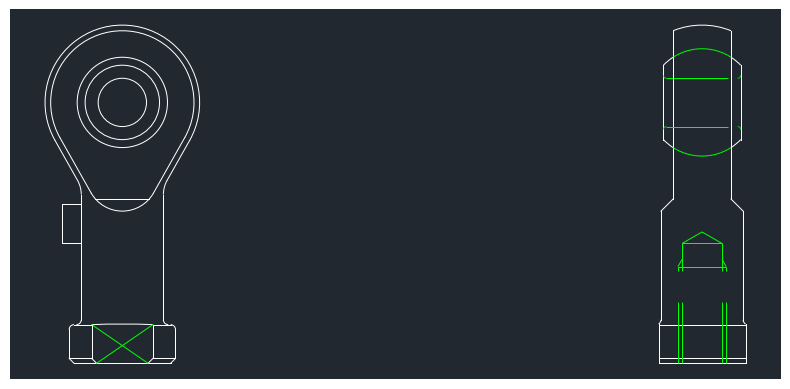

In [5]:
import ezdxf
from ezdxf.addons.drawing import RenderContext, Frontend, config
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

# 描画関数
def show(doc, msp):
    fig, ax = plt.subplots()
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)
    plt.show()

# PNG出力関数
def export_png(doc, msp, pagesize, output_name: str = "test.png", cfg=None):
    fig, ax = plt.subplots()
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    if cfg is None:
        cfg = config.Configuration(
            background_policy=config.BackgroundPolicy.WHITE,
            color_policy=config.ColorPolicy.COLOR
        )
    frontend = Frontend(ctx, out, config=cfg)
    frontend.draw_layout(msp)
    plt.savefig(output_name, dpi=300, bbox_inches="tight")
    plt.close(fig)

# DXFファイルの読み込み
input_dxf = "/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_C-PHSC/c-phsc05.dxf"
output_png = "test.png"

doc = ezdxf.readfile(input_dxf)
msp = doc.modelspace()

# ページサイズ設定
limmin = doc.header.get('$LIMMIN', [0, 0])  # 左下
limmax = doc.header.get('$LIMMAX', [100, 100])  # 右上
pagesize = (limmax[0] - limmin[0], limmax[1] - limmin[1])
print(f"ページサイズ: {pagesize}")

# TEXTエンティティを削除
texts_to_delete = msp.query("TEXT")
for text in texts_to_delete:
    msp.delete_entity(text)

# 中央線を削除し、かくれ線を破線として描画
for entity in msp:
    # 中央線 (layer名やlinetypeがCENTER) を削除
    if "center" in entity.dxf.layer.lower() or entity.dxf.linetype.lower() == "center":
        msp.delete_entity(entity)
    # かくれ線 (linetypeがHIDDEN) の場合、破線として設定
    elif entity.dxf.linetype.lower() == "hidden":
        entity.dxf.color = 3  # 線を緑色に設定（例）
        entity.dxf.lineweight = 0.15  # 線の太さを設定

# Config設定
cfg = config.Configuration(
    background_policy=config.BackgroundPolicy.WHITE,
    color_policy=config.ColorPolicy.COLOR,
    lineweight_policy=config.LineweightPolicy.ABSOLUTE
)

# 描画とPNG保存
show(doc, msp)
export_png(doc, msp, pagesize, output_png, cfg)


以下プロパティメモ<br>
https://qiita.com/Rai-see/items/aebf4587f7a9b30e3ab1

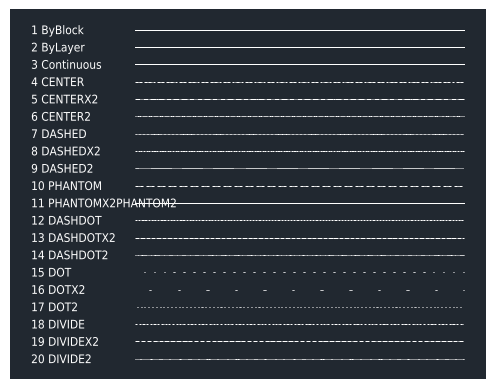

In [25]:
def linetype_list():
	linetypes =['ByBlock', 'ByLayer', 'Continuous', 'CENTER', 'CENTERX2', 'CENTER2', 'DASHED',
				'DASHEDX2', 'DASHED2', 'PHANTOM', 'PHANTOMX2' 'PHANTOM2', 'DASHDOT', 'DASHDOTX2',
				'DASHDOT2', 'DOT', 'DOTX2', 'DOT2', 'DIVIDE', 'DIVIDEX2', 'DIVIDE2']
	# read/make DFX
	doc = ezdxf.new("R2010", setup=True)
	msp = doc.modelspace()
	# draw
	for i,linetype in enumerate(linetypes):
		msp.add_text(str(i+1)+" " + linetype, dxfattribs={'layer':'TEXTLAYER','style': i,'height':10,'insert':(0,-20*i)})
		msp.add_line(start=[120, -20*i+5], end=[500,-20*i+5], dxfattribs={'layer':'TEXTLAYER','linetype': linetype})
	# plot
	show(doc, msp)

linetype_list()

In [ ]:
def font_list():
	styles =['Standard', 'OpenSans-Light', 'OpenSans-Light-Italic', 'OpenSans', 'OpenSans-Italic',
				'OpenSans-SemiBold', 'OpenSans-SemiBoldItalic', 'OpenSans-Bold', 'OpenSans-BoldItalic',
				'OpenSans-ExtraBold', 'OpenSans-ExtraBoldItalic', 'OpenSansCondensed-Bold', 'OpenSansCondensed-Light',
				'OpenSansCondensed-Italic', 'LiberationSans', 'LiberationSans-Bold', 'LiberationSans-BoldItalic',
				'LiberationSans-Italic', 'LiberationSerif', 'LiberationSerif-Bold', 'LiberationSerif-BoldItalic',
				'LiberationSerif-Italic', 'LiberationMono', 'LiberationMono-Bold', 'LiberationMono-BoldItalic', 'LiberationMono-Italic']

	doc = ezdxf.new("R2010", setup=True  ,units=True)
	msp = doc.modelspace()

	for i,style in enumerate(styles):
		msp.add_text("style "+str(i+1)+" " + style, dxfattribs={'layer': 'TEXTLAYER','style': style,'height':10,'insert':(280*(i//20),-20*(i%20))})
	# plot
	show(doc, msp)

font_list()

In [ ]:
def dimstyle_list():
	dimstyles =['Standard', 'EZDXF', 'EZ_M_100_H25_CM', 'EZ_M_50_H25_CM', 'EZ_M_25_H25_CM', 'EZ_M_20_H25_CM', 'EZ_M_10_H25_CM', 'EZ_M_5_H25_CM', 'EZ_M_1_H25_CM', 'EZ_RADIUS', 'EZ_RADIUS_INSIDE', 'EZ_CURVED']

	doc = ezdxf.new("R2010", setup=True)
	msp = doc.modelspace()

	for i,dimstyle in enumerate(dimstyles):
		msp.add_text(str(i+1)+" "+dimstyle, dxfattribs={'layer':'TEXTLAYER','style':dimstyle,'height':0.1,'insert':(-2+(i//6)*4, -0.7*(i%6))})
		# msp.add_line(start=[0, -0.5*i+0.1], end=[1,-0.5*i+0.1], dxfattribs={'layer':'TEXTLAYER'})

		dim = msp.add_linear_dim(
			base=(1+(i//6)*4,  -0.7*(i%6)+0.1),  # location of the dimension line
			p1=(0+(i//6)*4,  -0.7*(i%6)+0.1),  # 1st measurement point
			p2=(1.5+(i//6)*4,  -0.7*(i%6)+0.1),  # 2nd measurement point
			dimstyle=dimstyle,  # default dimension style
		).render()
	# plot
	show(doc, msp)

dimstyle_list()

- 一括変換支援コード

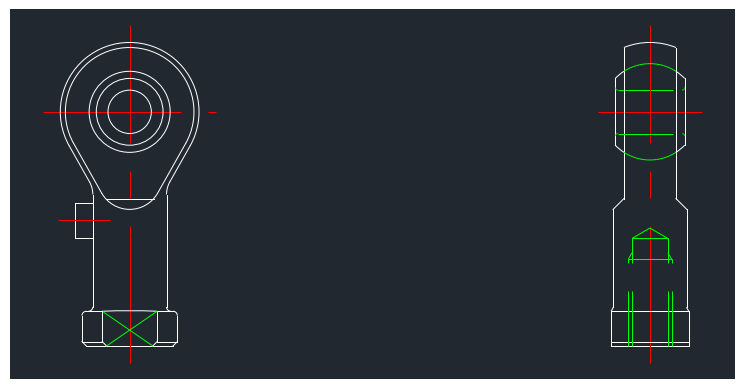

In [16]:
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend, config
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import random

def show(doc, msp):
    # プロットの準備
    fig, ax = plt.subplots()  # FigureとAxesを作成
    ctx = RenderContext(doc)  # RenderContextを作成
    out = MatplotlibBackend(ax)  # MatplotlibBackendにAxesを渡す
    Frontend(ctx, out).draw_layout(msp, finalize=True)  # 描画
    plt.show()  # プロットを表示

def export_png(doc, msp, pagesize, output_name: str = "test.png", cfg=None):
    fig, ax = plt.subplots()  # 新しいFigureとAxesを作成
    context = RenderContext(doc)
    backend = MatplotlibBackend(ax)  # MatplotlibBackendにAxesを渡す
    if cfg is None:
        cfg = config.Configuration(
            background_policy=config.BackgroundPolicy.WHITE,
            color_policy=config.ColorPolicy.BLACK
        )
    frontend = Frontend(context, backend, config=cfg)
    frontend.draw_layout(msp)  # 描画
    plt.savefig(output_name, dpi=300, bbox_inches="tight")  # PNG保存
    plt.close(fig)  # Figureを閉じる

# DXFファイルの読み込み
input_dxf = "/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_C-PHSC/c-phsc05.dxf"
output_png = "test.png"

# Recoverを使用してDXFファイルを開く
doc, auditor = recover.readfile(input_dxf)

# エラーがある場合の対処
if auditor.has_errors:
    print("Errors found in DXF file:")
    auditor.print_report()

msp = doc.modelspace()

# ページサイズ設定
limmin = doc.header.get('$LIMMIN', [0, 0])  # 左下
limmax = doc.header.get('$LIMMAX', [100, 100])  # 右上
pagesize = (limmax[0] - limmin[0], limmax[1] - limmin[1])

# TEXTエンティティを削除
texts_to_delete = msp.query("TEXT")
for text in texts_to_delete:
    msp.delete_entity(text)

# フィルタリング条件に基づく描画エンティティの選別
view_entities = []
for entity in msp:
    # 例: 補助線や中央線を除外する条件を定義（レイヤーや線種に基づく）
    if entity.dxftype() in ['LINE', 'CIRCLE', 'ARC']:
        # 中央線や補助線をフィルタリングする例
        if "center" in entity.dxf.layer.lower() or "assist" in entity.dxf.layer.lower():
            continue  # 中央線や補助線をスキップ
        view_entities.append(entity)

# 描画対象をランダム選択（例）
view_entities = random.sample(view_entities, min(len(view_entities), 3))

# Config設定
cfg = config.Configuration(
    background_policy=config.BackgroundPolicy.WHITE,
    color_policy=config.ColorPolicy.COLOR,
    lineweight_policy=config.LineweightPolicy.ABSOLUTE
)

# 描画とPNG保存
show(doc, msp)
export_png(doc, msp, pagesize, output_png, cfg)


In [17]:
pwd

'/home/kfujii/image-retrieval-transformers/notebooks'